## Monte Carlo Policy Iteration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from env_simulator import ToyEnv

In [3]:
env = ToyEnv()

In [4]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.shape[0]
n_episodes = 2000
gamma = 0.98
epsilon = 1
max_steps_per_ep = 100
learning_rate = 0.5

In [12]:
Q = np.zeros([n_states, n_actions])
N = np.zeros([n_states, n_actions])

In [6]:
def choose_action(s):
    prob = [float(epsilon)/n_actions]*n_actions
    prob[np.argmax(Q[s,:])] += 1-epsilon
    a = np.random.choice(n_actions,1,p=prob)
    return a[0]

In [13]:
rewards = [] # To hold total reward per episode
avg_rewards = [] # To hold running average of rewards per episode
for ep in range(n_episodes):
    s,r,done = env.reset()
    a = choose_action(s)
    r_list = []
    s_list = []
    n_step = 0
    ep_r = 0
    epsilon = 1.0/(ep+1)
    while not done:
        s_list.append((s,a))
        N[s,a] += 1
        s,r,done = env.step(a)
        r_list.append(r)
        a = choose_action(s)
        ep_r += r
        n_step += 1
        if n_step > max_steps_per_ep:
            break
    discounted_r = 0
    for i in range(len(r_list)-1,0,-1):
        discounted_r = gamma*discounted_r + r_list[i]
        Q[s_list[i]] += (1.0/N[s_list[i]])*(discounted_r - Q[s_list[i]])
    rewards.append(ep_r)
    avg_rewards.append(sum(rewards[-500:])/500.0)
    if not ep % 100:
        print("Episode #%d : Reward = %f, Avg Rew = %f" % (ep, ep_r, avg_rewards[-1]))    

Episode #0 : Reward = 1.000000, Avg Rew = 0.002000
Episode #100 : Reward = 1.000000, Avg Rew = 0.022000
Episode #200 : Reward = -1.000000, Avg Rew = 0.018000
Episode #300 : Reward = 1.000000, Avg Rew = -0.006000
Episode #400 : Reward = -1.000000, Avg Rew = 0.010000
Episode #500 : Reward = -1.000000, Avg Rew = -0.008000
Episode #600 : Reward = -1.000000, Avg Rew = -0.040000
Episode #700 : Reward = 1.000000, Avg Rew = -0.056000
Episode #800 : Reward = 1.000000, Avg Rew = -0.040000
Episode #900 : Reward = 1.000000, Avg Rew = -0.056000
Episode #1000 : Reward = 1.000000, Avg Rew = -0.060000
Episode #1100 : Reward = 1.000000, Avg Rew = -0.024000
Episode #1200 : Reward = -1.000000, Avg Rew = -0.028000
Episode #1300 : Reward = 1.000000, Avg Rew = -0.040000
Episode #1400 : Reward = 1.000000, Avg Rew = 0.000000
Episode #1500 : Reward = -1.000000, Avg Rew = 0.008000
Episode #1600 : Reward = -1.000000, Avg Rew = -0.036000
Episode #1700 : Reward = -1.000000, Avg Rew = -0.020000
Episode #1800 : Rewa

Q Values Learned [[ 0.          0.          0.14844171  0.        ]
 [ 0.16301752  0.         -0.01523134  0.        ]
 [-0.43052742 -0.43037685 -0.27671071 -0.9604    ]
 [-1.         -1.         -1.         -1.        ]
 [ 0.          1.          0.          1.        ]]


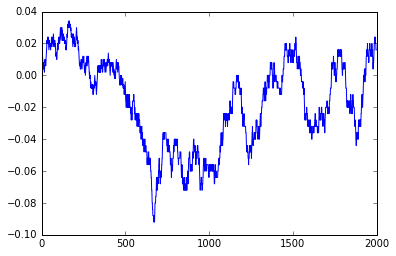

In [14]:
print "Q Values Learned", Q
plt.plot(avg_rewards)